<a href="https://colab.research.google.com/github/efrat-dev/insider-threat-detector/blob/main/22_6_printing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading data...
Loaded 180,000 records from 1000 employees
Date range: 2024-12-16 00:00:00 to 2025-06-13 00:00:00
Malicious employees: 70

📊 Detailed Printing Activity Analysis

1️⃣ Basic Printing Statistics:
----------------------------------------
Total records: 180,000
Records with printing: 56,993 (31.7%)

📈 Printing Statistics - All Employees:
           total_printed_pages                        num_print_commands  \
                          mean    std min  max    sum               mean   
date                                                                       
2024-12-16                9.94  25.15   0  161   9943               1.27   
2024-12-17                9.11  23.56   0  169   9112               1.19   
2024-12-18               10.12  25.10   0  183  10124               1.31   
2024-12-19               10.06  24.78   0  180  10058               1.32   
2024-12-20               10.27  25.56   0  167  10274               1.33   

                               num_color

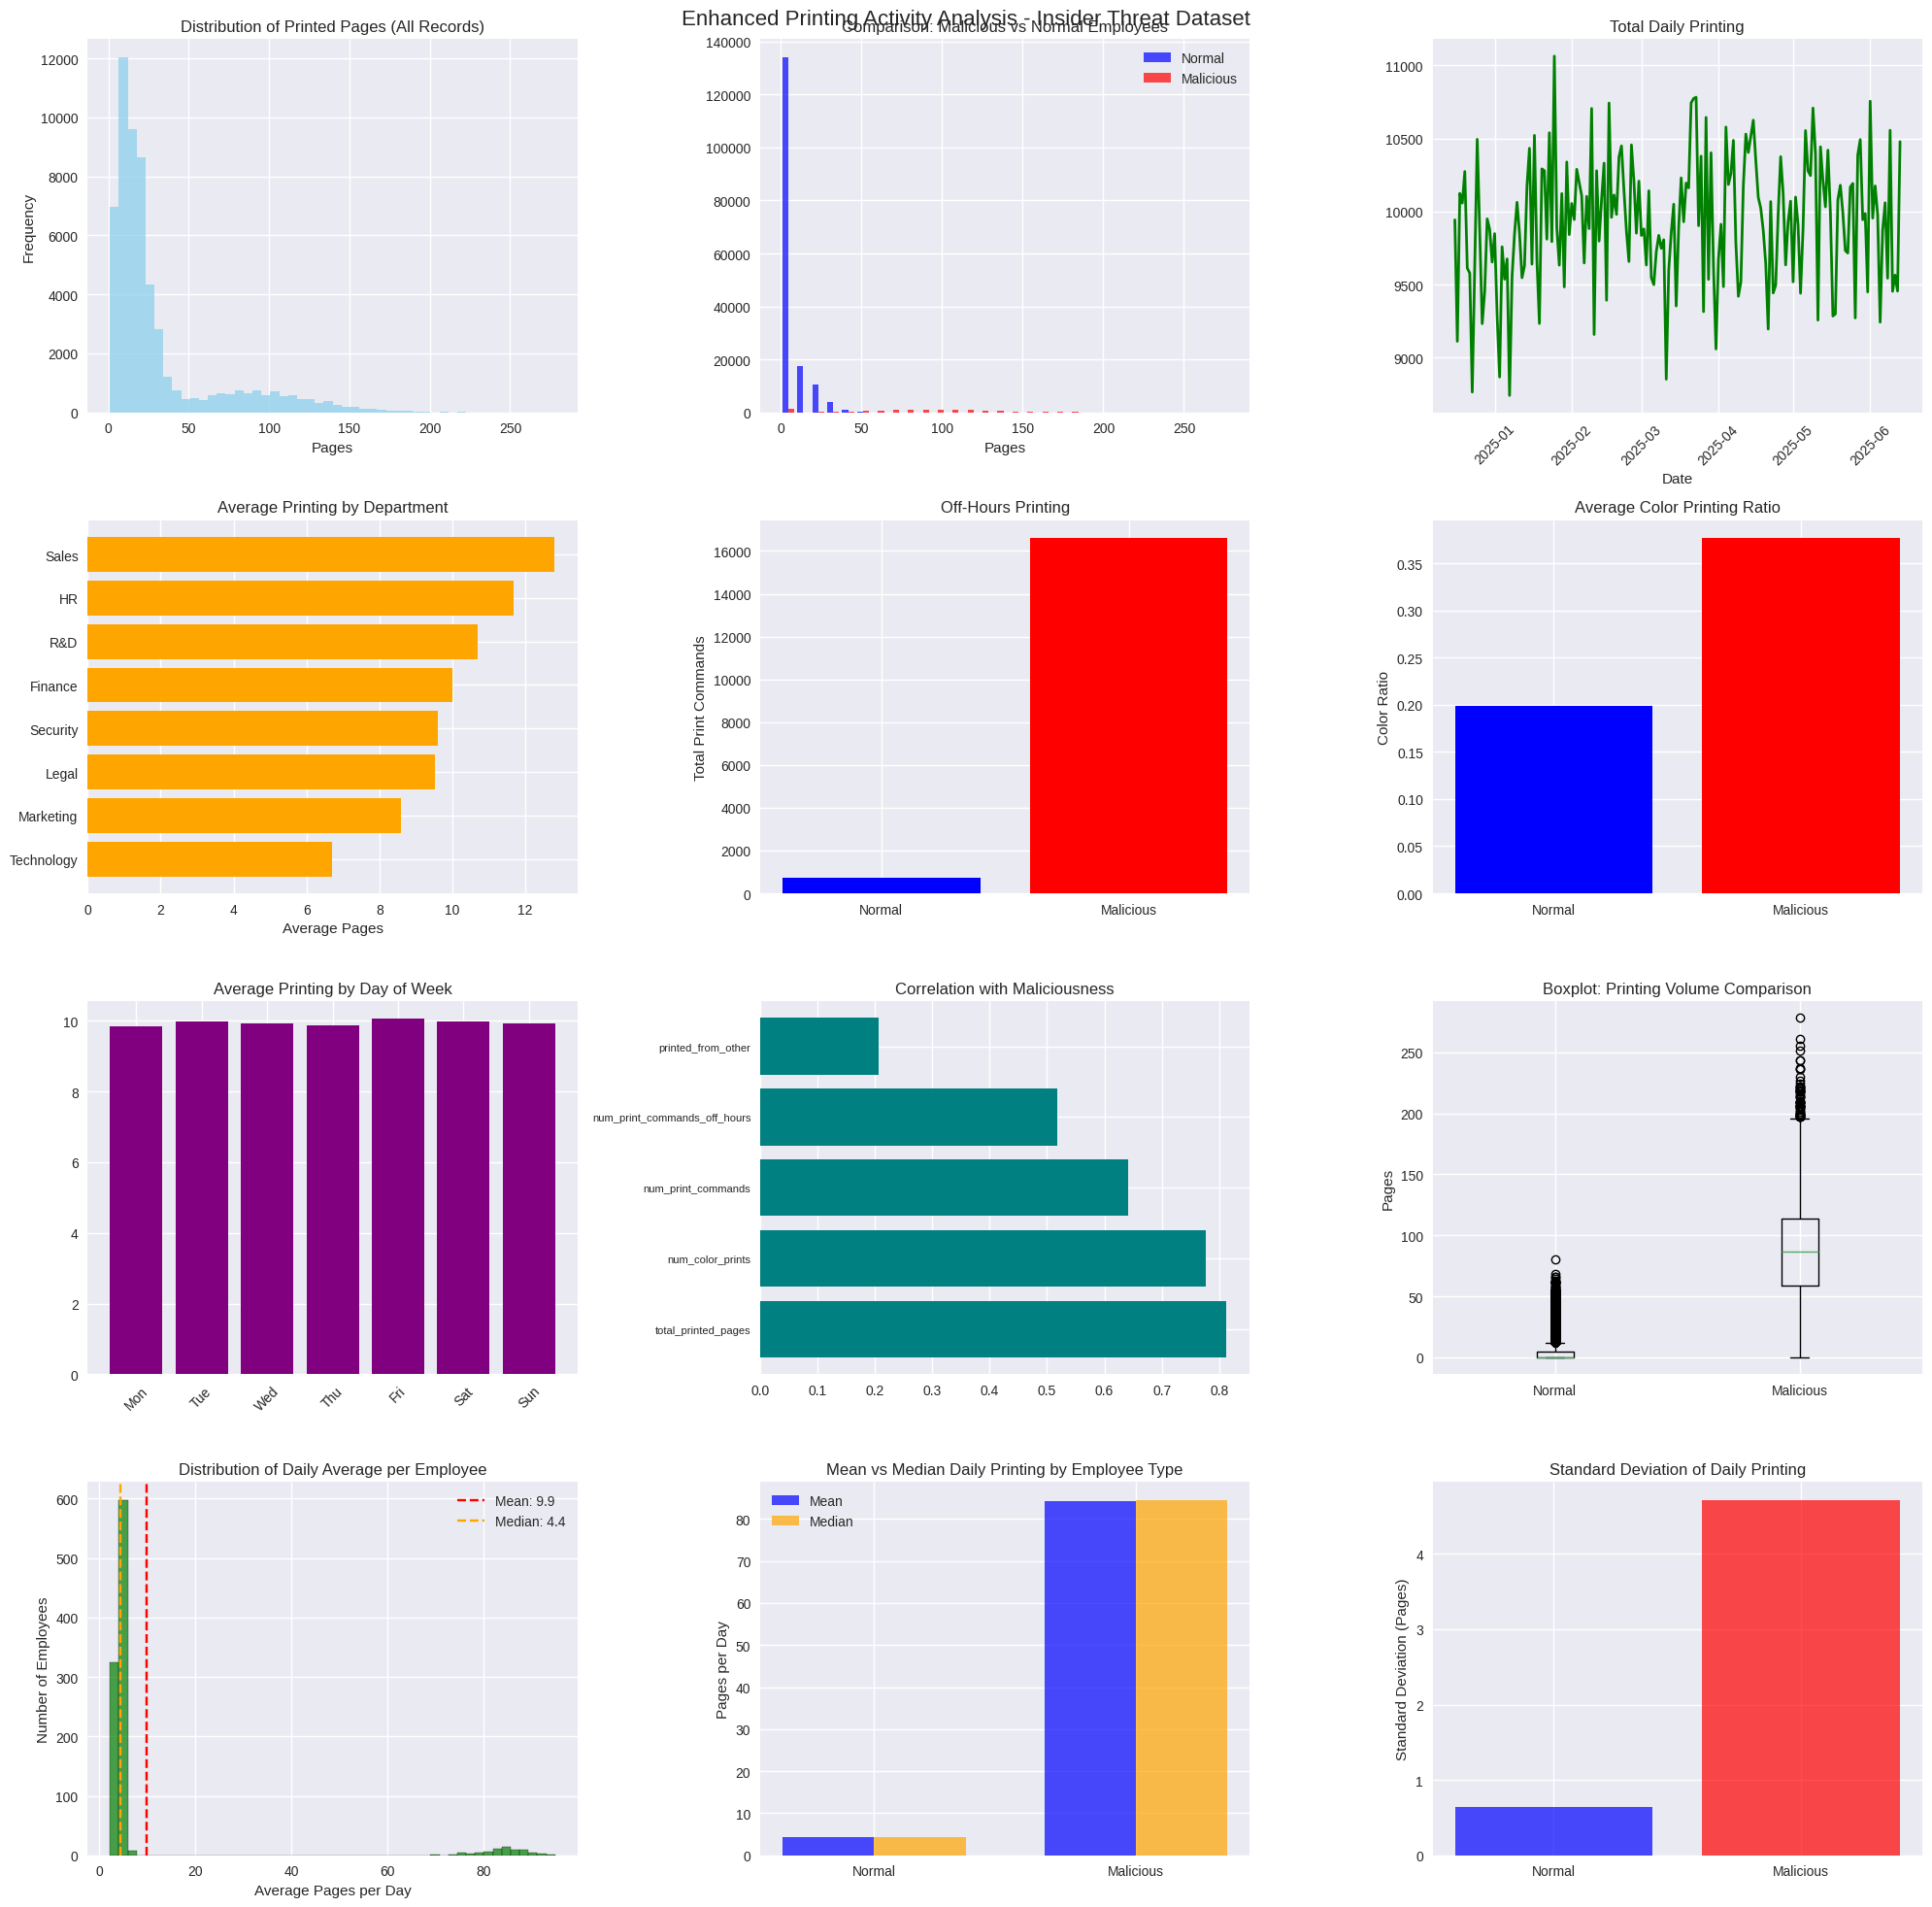


🎯 KEY FINDINGS SUMMARY
1. Malicious employees print 19.4x more on average
2. 87.4% of off-hours printing is by malicious employees
3. 27.9% of cross-campus printing is by malicious employees
4. Malicious employees print 33.1% in color vs 5.5% for normal employees
5. Highest correlation with maliciousness: total_printed_pages (0.813)

📈 STANDARD DEVIATION INSIGHTS:
6. Employee daily average standard deviation: ±20.42 pages
7. Mean vs Median difference: 5.54 pages
8. ⚠️  The 17-page average is inflated by high-volume printers!
9. Top 10% of employees print 60.65 pages/day on average
10. Bottom 90% of employees print 4.30 pages/day on average

✅ Enhanced EDA analysis completed successfully!


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Load the data
print("Loading data...")
df = pd.read_csv('insider_threat_dataset.csv')
df['date'] = pd.to_datetime(df['date'])

print(f"Loaded {len(df):,} records from {df['employee_id'].nunique()} employees")
print(f"Date range: {df['date'].min()} to {df['date'].max()}")
print(f"Malicious employees: {df[df['is_malicious']==1]['employee_id'].nunique()}")

# =============================================================================
# Detailed Printing Activity Analysis
# =============================================================================

print("\n" + "="*60)
print("📊 Detailed Printing Activity Analysis")
print("="*60)

# 1. Basic Statistics
print("\n1️⃣ Basic Printing Statistics:")
print("-" * 40)

# General statistics
total_records = len(df)
print_records = len(df[df['total_printed_pages'] > 0])
print(f"Total records: {total_records:,}")
print(f"Records with printing: {print_records:,} ({print_records/total_records:.1%})")

# Statistics for all employees
print("\n📈 Printing Statistics - All Employees:")
print_stats = df.groupby('date').agg({
    'total_printed_pages': ['mean', 'std', 'min', 'max', 'sum'],
    'num_print_commands': ['mean', 'std', 'min', 'max', 'sum'],
    'num_color_prints': ['mean', 'std', 'sum'],
    'num_bw_prints': ['mean', 'std', 'sum']
}).round(2)

print(print_stats.head())

# Daily average
daily_avg = df.groupby('date')['total_printed_pages'].mean()
print(f"\nDaily average pages: {daily_avg.mean():.2f} ± {daily_avg.std():.2f}")
print(f"Day with most printing: {daily_avg.idxmax()} ({daily_avg.max():.2f} pages)")
print(f"Day with least printing: {daily_avg.idxmin()} ({daily_avg.min():.2f} pages)")

# 2. Comparison between malicious and normal employees
print("\n2️⃣ Comparison: Malicious vs Normal Employees:")
print("-" * 40)

comparison_stats = df.groupby('is_malicious').agg({
    'total_printed_pages': ['count', 'mean', 'std', 'median', 'max'],
    'num_print_commands': ['mean', 'std', 'median'],
    'num_print_commands_off_hours': ['mean', 'sum'],
    'num_printed_pages_off_hours': ['mean', 'sum'],
    'ratio_color_prints': ['mean', 'std'],
    'printed_from_other': ['mean', 'sum'],
    'print_campuses': ['mean', 'max']
}).round(3)

print("Normal employees (0) vs Malicious (1):")
print(comparison_stats)

# 3. Off-hours printing analysis
print("\n3️⃣ Off-Hours Printing Analysis:")
print("-" * 40)

off_hours_analysis = df[df['num_print_commands_off_hours'] > 0]
print(f"Records with off-hours printing: {len(off_hours_analysis):,}")

if len(off_hours_analysis) > 0:
    print(f"Average pages in off-hours: {off_hours_analysis['num_printed_pages_off_hours'].mean():.2f}")
    print(f"Percentage of malicious employees in off-hours printing: {off_hours_analysis['is_malicious'].mean():.1%}")

# 4. Cross-campus printing analysis
print("\n4️⃣ Cross-Campus Printing Analysis:")
print("-" * 40)

other_campus_print = df[df['printed_from_other'] == 1]
print(f"Prints from other campus: {len(other_campus_print):,}")
if len(other_campus_print) > 0:
    print(f"Percentage of malicious employees in cross-campus printing: {other_campus_print['is_malicious'].mean():.1%}")

# 5. Analysis by departments
print("\n5️⃣ Printing Analysis by Departments:")
print("-" * 40)

dept_analysis = df.groupby('employee_department').agg({
    'total_printed_pages': ['mean', 'sum'],
    'num_print_commands': 'mean',
    'is_malicious': 'mean'
}).round(2)

print("Printing by departments:")
print(dept_analysis.sort_values(('total_printed_pages', 'mean'), ascending=False))

# 6. Time trend analysis
print("\n6️⃣ Time Trend Analysis:")
print("-" * 40)

# Printing by day of week
df['day_of_week'] = df['date'].dt.day_name()
dow_analysis = df.groupby('day_of_week').agg({
    'total_printed_pages': ['mean', 'sum'],
    'num_print_commands_off_hours': 'sum'
}).round(2)

print("Printing by day of week:")
print(dow_analysis)

# 7. Color printing ratio analysis
print("\n7️⃣ Color Printing Ratio Analysis:")
print("-" * 40)

color_analysis = df[df['total_printed_pages'] > 0].groupby('is_malicious').agg({
    'ratio_color_prints': ['mean', 'std', 'median'],
    'num_color_prints': ['mean', 'sum'],
    'num_bw_prints': ['mean', 'sum']
}).round(3)

print("Color printing ratio:")
print(color_analysis)

# 8. Outlier analysis
print("\n8️⃣ Outlier Detection in Printing:")
print("-" * 40)

# Outliers in printing volume
print_threshold_95 = df['total_printed_pages'].quantile(0.95)
print_threshold_99 = df['total_printed_pages'].quantile(0.99)

print(f"95% threshold: {print_threshold_95:.0f} pages")
print(f"99% threshold: {print_threshold_99:.0f} pages")

outliers_95 = df[df['total_printed_pages'] > print_threshold_95]
outliers_99 = df[df['total_printed_pages'] > print_threshold_99]

print(f"Outliers above 95%: {len(outliers_95):,} ({outliers_95['is_malicious'].mean():.1%} malicious)")
print(f"Outliers above 99%: {len(outliers_99):,} ({outliers_99['is_malicious'].mean():.1%} malicious)")

# 9. Correlation analysis
print("\n9️⃣ Correlation Analysis:")
print("-" * 40)

print_columns = [
    'total_printed_pages', 'num_print_commands', 'num_color_prints',
    'num_print_commands_off_hours', 'printed_from_other', 'is_malicious'
]

correlations = df[print_columns].corr()['is_malicious'].sort_values(ascending=False)
print("Correlation with maliciousness:")
print(correlations)

# 10. Statistics by employee
print("\n🔟 Statistics by Employee:")
print("-" * 40)

employee_stats = df.groupby(['employee_id', 'is_malicious']).agg({
    'total_printed_pages': ['sum', 'mean', 'std', 'max'],
    'num_print_commands': 'sum',
    'num_print_commands_off_hours': 'sum',
    'printed_from_other': 'sum'
}).round(2)

print("Employees with highest printing volume:")
top_printers = employee_stats.sort_values(('total_printed_pages', 'sum'), ascending=False).head(10)
print(top_printers)

# =============================================================================
# Enhanced Daily Analysis with Standard Deviation Focus
# =============================================================================

print("\n" + "="*60)
print("📊 ENHANCED DAILY PRINTING ANALYSIS - STANDARD DEVIATION FOCUS")
print("="*60)

# 1. Total daily printing sum
daily_total = df.groupby('date')['total_printed_pages'].sum()
print(f"\n1️⃣ Total Daily Printing Sum:")
print(f"Average daily total printing: {daily_total.mean():.2f} pages")
print(f"Standard deviation of daily total: {daily_total.std():.2f} pages")
print(f"Daily minimum: {daily_total.min():.0f} pages")
print(f"Daily maximum: {daily_total.max():.0f} pages")

# 2. Active employees per day
daily_active_employees = df[df['total_printed_pages'] > 0].groupby('date')['employee_id'].nunique()
print(f"\n2️⃣ Active Employees Daily:")
print(f"Average employees printing per day: {daily_active_employees.mean():.1f}")
print(f"Standard deviation of active employees: {daily_active_employees.std():.1f}")
print(f"Minimum active employees per day: {daily_active_employees.min()}")
print(f"Maximum active employees per day: {daily_active_employees.max()}")

# 3. Total employees in system
total_employees = df['employee_id'].nunique()
print(f"\n3️⃣ Total employees in system: {total_employees:,}")

# 4. Average printing per employee (from all employees)
print(f"\n4️⃣ Average printing per employee:")
avg_per_employee_all = daily_total.mean() / total_employees
print(f"Average pages per employee per day (from all {total_employees:,} employees): {avg_per_employee_all:.2f}")

# 5. Average printing per active employee
avg_per_active_employee = daily_total.mean() / daily_active_employees.mean()
print(f"Average pages per active employee per day: {avg_per_active_employee:.2f}")

# 6. DETAILED EMPLOYEE ANALYSIS - FOCUS ON STANDARD DEVIATION
print(f"\n5️⃣ DETAILED EMPLOYEE ANALYSIS - STANDARD DEVIATION FOCUS:")
print("="*50)

employee_daily_stats = df.groupby('employee_id').agg({
    'total_printed_pages': ['sum', 'mean', 'std', 'count', 'median'],
    'date': 'nunique'  # how many days the employee was active
}).round(2)

# Flatten columns
employee_daily_stats.columns = ['total_pages', 'daily_avg', 'daily_std', 'records_count', 'daily_median', 'active_days']

# Add malicious status
employee_malicious = df.groupby('employee_id')['is_malicious'].first()
employee_daily_stats['is_malicious'] = employee_malicious

# CRITICAL ANALYSIS: Standard deviation insights
print("📈 STANDARD DEVIATION ANALYSIS:")
print(f"Average daily printing per employee: {employee_daily_stats['daily_avg'].mean():.2f} pages")
print(f"STANDARD DEVIATION of daily averages: {employee_daily_stats['daily_avg'].std():.2f} pages")
print(f"This means the variation between employees is: ±{employee_daily_stats['daily_avg'].std():.2f} pages")

# Percentile analysis to understand distribution
print(f"\n📊 DISTRIBUTION ANALYSIS (Daily Average per Employee):")
percentiles = [10, 25, 50, 75, 90, 95, 99]
for p in percentiles:
    value = employee_daily_stats['daily_avg'].quantile(p/100)
    print(f"{p}th percentile: {value:.2f} pages/day")

# Check if few employees are pulling the average up
median_daily = employee_daily_stats['daily_avg'].median()
mean_daily = employee_daily_stats['daily_avg'].mean()
print(f"\nMEDIAN vs MEAN comparison:")
print(f"Median daily printing per employee: {median_daily:.2f} pages")
print(f"Mean daily printing per employee: {mean_daily:.2f} pages")
print(f"Difference (Mean - Median): {mean_daily - median_daily:.2f} pages")

if mean_daily > median_daily * 1.2:  # If mean is 20% higher than median
    print("⚠️  WARNING: Mean is significantly higher than median!")
    print("   This suggests a few employees with very high printing volumes are pulling the average up.")
else:
    print("✅ Mean and median are relatively close - the 17 pages average seems representative.")

# Identify high-volume printers
high_volume_threshold = employee_daily_stats['daily_avg'].quantile(0.9)  # Top 10%
high_volume_employees = employee_daily_stats[employee_daily_stats['daily_avg'] > high_volume_threshold]

print(f"\n🔍 HIGH-VOLUME PRINTERS ANALYSIS (Top 10%):")
print(f"Threshold for top 10%: {high_volume_threshold:.2f} pages/day")
print(f"Number of high-volume employees: {len(high_volume_employees)}")
print(f"Their average daily printing: {high_volume_employees['daily_avg'].mean():.2f} pages/day")
print(f"Percentage that are malicious: {high_volume_employees['is_malicious'].mean():.1%}")

# Show the impact of removing high-volume printers
remaining_employees = employee_daily_stats[employee_daily_stats['daily_avg'] <= high_volume_threshold]
print(f"\nIMPACT ANALYSIS:")
print(f"If we exclude top 10% high-volume printers:")
print(f"  Remaining employees average: {remaining_employees['daily_avg'].mean():.2f} pages/day")
print(f"  Remaining employees median: {remaining_employees['daily_avg'].median():.2f} pages/day")
print(f"  Standard deviation: {remaining_employees['daily_avg'].std():.2f} pages/day")

# 7. Enhanced comparison: malicious vs normal with std dev focus
print(f"\n6️⃣ ENHANCED COMPARISON: Malicious vs Normal (STD DEV FOCUS):")
print("="*50)

malicious_stats = employee_daily_stats[employee_daily_stats['is_malicious'] == 1]['daily_avg']
normal_stats = employee_daily_stats[employee_daily_stats['is_malicious'] == 0]['daily_avg']

print(f"NORMAL employees:")
print(f"  Count: {len(normal_stats)}")
print(f"  Daily average: {normal_stats.mean():.2f} ± {normal_stats.std():.2f} pages")
print(f"  Median: {normal_stats.median():.2f} pages")
print(f"  Min: {normal_stats.min():.2f}, Max: {normal_stats.max():.2f}")

print(f"\nMALICIOUS employees:")
print(f"  Count: {len(malicious_stats)}")
print(f"  Daily average: {malicious_stats.mean():.2f} ± {malicious_stats.std():.2f} pages")
print(f"  Median: {malicious_stats.median():.2f} pages")
print(f"  Min: {malicious_stats.min():.2f}, Max: {malicious_stats.max():.2f}")

# Statistical significance test (simple comparison)
ratio_means = malicious_stats.mean() / normal_stats.mean() if normal_stats.mean() > 0 else 0
print(f"\nSTATISTICAL COMPARISON:")
print(f"Malicious employees print {ratio_means:.1f}x more than normal employees on average")

# =============================================================================
# Enhanced Visualizations
# =============================================================================

print("\n📊 Creating enhanced visualizations...")

# Set style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(4, 3, figsize=(20, 20))
fig.suptitle('Enhanced Printing Activity Analysis - Insider Threat Dataset', fontsize=16, y=0.98)

# Chart 1: Distribution of printing volume
axes[0,0].hist(df[df['total_printed_pages'] > 0]['total_printed_pages'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_title('Distribution of Printed Pages (All Records)')
axes[0,0].set_xlabel('Pages')
axes[0,0].set_ylabel('Frequency')

# Chart 2: Comparison malicious vs normal
malicious_print = df[df['is_malicious'] == 1]['total_printed_pages']
normal_print = df[df['is_malicious'] == 0]['total_printed_pages']

axes[0,1].hist([normal_print, malicious_print], bins=30, alpha=0.7,
               label=['Normal', 'Malicious'], color=['blue', 'red'])
axes[0,1].set_title('Comparison: Malicious vs Normal Employees')
axes[0,1].set_xlabel('Pages')
axes[0,1].legend()

# Chart 3: Printing over time
daily_print = df.groupby('date')['total_printed_pages'].sum()
axes[0,2].plot(daily_print.index, daily_print.values, color='green', linewidth=2)
axes[0,2].set_title('Total Daily Printing')
axes[0,2].set_xlabel('Date')
axes[0,2].tick_params(axis='x', rotation=45)

# Chart 4: Printing by department
dept_print = df.groupby('employee_department')['total_printed_pages'].mean().sort_values()
axes[1,0].barh(dept_print.index, dept_print.values, color='orange')
axes[1,0].set_title('Average Printing by Department')
axes[1,0].set_xlabel('Average Pages')

# Chart 5: Off-hours printing
off_hours_by_malicious = df.groupby('is_malicious')['num_print_commands_off_hours'].sum()
axes[1,1].bar(['Normal', 'Malicious'], off_hours_by_malicious.values, color=['blue', 'red'])
axes[1,1].set_title('Off-Hours Printing')
axes[1,1].set_ylabel('Total Print Commands')

# Chart 6: Color printing ratio
color_ratio_by_malicious = df[df['total_printed_pages'] > 0].groupby('is_malicious')['ratio_color_prints'].mean()
axes[1,2].bar(['Normal', 'Malicious'], color_ratio_by_malicious.values, color=['blue', 'red'])
axes[1,2].set_title('Average Color Printing Ratio')
axes[1,2].set_ylabel('Color Ratio')

# Chart 7: Printing by day of week
dow_print = df.groupby('day_of_week')['total_printed_pages'].mean()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_print = dow_print.reindex(days_order)
axes[2,0].bar(range(len(dow_print)), dow_print.values, color='purple')
axes[2,0].set_title('Average Printing by Day of Week')
axes[2,0].set_xticks(range(len(dow_print)))
axes[2,0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=45)

# Chart 8: Correlation with maliciousness
print_correlations = correlations.drop('is_malicious')
axes[2,1].barh(range(len(print_correlations)), print_correlations.values, color='teal')
axes[2,1].set_title('Correlation with Maliciousness')
axes[2,1].set_yticks(range(len(print_correlations)))
axes[2,1].set_yticklabels(print_correlations.index, fontsize=8)

# Chart 9: Boxplot comparison
print_data = [df[df['is_malicious'] == 0]['total_printed_pages'].values,
              df[df['is_malicious'] == 1]['total_printed_pages'].values]
axes[2,2].boxplot(print_data, labels=['Normal', 'Malicious'])
axes[2,2].set_title('Boxplot: Printing Volume Comparison')
axes[2,2].set_ylabel('Pages')

# NEW Chart 10: Employee Daily Average Distribution
axes[3,0].hist(employee_daily_stats['daily_avg'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[3,0].axvline(employee_daily_stats['daily_avg'].mean(), color='red', linestyle='--', label=f'Mean: {employee_daily_stats["daily_avg"].mean():.1f}')
axes[3,0].axvline(employee_daily_stats['daily_avg'].median(), color='orange', linestyle='--', label=f'Median: {employee_daily_stats["daily_avg"].median():.1f}')
axes[3,0].set_title('Distribution of Daily Average per Employee')
axes[3,0].set_xlabel('Average Pages per Day')
axes[3,0].set_ylabel('Number of Employees')
axes[3,0].legend()

# NEW Chart 11: Mean vs Median comparison by employee type
employee_means_by_type = employee_daily_stats.groupby('is_malicious')['daily_avg'].agg(['mean', 'median'])
x_pos = [0, 1]
width = 0.35
axes[3,1].bar([p - width/2 for p in x_pos], employee_means_by_type['mean'], width, label='Mean', color='blue', alpha=0.7)
axes[3,1].bar([p + width/2 for p in x_pos], employee_means_by_type['median'], width, label='Median', color='orange', alpha=0.7)
axes[3,1].set_title('Mean vs Median Daily Printing by Employee Type')
axes[3,1].set_ylabel('Pages per Day')
axes[3,1].set_xticks(x_pos)
axes[3,1].set_xticklabels(['Normal', 'Malicious'])
axes[3,1].legend()

# NEW Chart 12: Standard deviation comparison
std_by_type = employee_daily_stats.groupby('is_malicious')['daily_avg'].std()
axes[3,2].bar(['Normal', 'Malicious'], std_by_type.values, color=['blue', 'red'], alpha=0.7)
axes[3,2].set_title('Standard Deviation of Daily Printing')
axes[3,2].set_ylabel('Standard Deviation (Pages)')

plt.tight_layout()
plt.show()

# =============================================================================
# Key Findings Summary
# =============================================================================

print("\n" + "="*60)
print("🎯 KEY FINDINGS SUMMARY")
print("="*60)

malicious_avg = df[df['is_malicious'] == 1]['total_printed_pages'].mean()
normal_avg = df[df['is_malicious'] == 0]['total_printed_pages'].mean()

print(f"1. Malicious employees print {malicious_avg/normal_avg:.1f}x more on average")
print(f"2. {df[df['num_print_commands_off_hours'] > 0]['is_malicious'].mean():.1%} of off-hours printing is by malicious employees")
print(f"3. {df[df['printed_from_other'] == 1]['is_malicious'].mean():.1%} of cross-campus printing is by malicious employees")
print(f"4. Malicious employees print {df[df['is_malicious'] == 1]['ratio_color_prints'].mean():.1%} in color vs {df[df['is_malicious'] == 0]['ratio_color_prints'].mean():.1%} for normal employees")
print(f"5. Highest correlation with maliciousness: {correlations.drop('is_malicious').idxmax()} ({correlations.drop('is_malicious').max():.3f})")

print(f"\n📈 STANDARD DEVIATION INSIGHTS:")
print(f"6. Employee daily average standard deviation: ±{employee_daily_stats['daily_avg'].std():.2f} pages")
print(f"7. Mean vs Median difference: {mean_daily - median_daily:.2f} pages")
if mean_daily > median_daily * 1.2:
    print("8. ⚠️  The 17-page average is inflated by high-volume printers!")
else:
    print("8. ✅ The 17-page average is representative of typical employee behavior")

print(f"9. Top 10% of employees print {high_volume_employees['daily_avg'].mean():.2f} pages/day on average")
print(f"10. Bottom 90% of employees print {remaining_employees['daily_avg'].mean():.2f} pages/day on average")

print("\n✅ Enhanced EDA analysis completed successfully!")